<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/Boosting_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Boosting combines weak learners to form a strong learner by focusing on the errors of previous models. Each new model corrects the mistakes of the previous ones, improving overall performance.

2. Boosting corrects errors of previous models, while Bagging reduces variance by averaging multiple models' predictions. Boosting focuses on difficult cases, whereas Bagging uses random sampling.

3. AdaBoost adjusts the weights of misclassified instances, making them more important in subsequent models. This iterative process improves accuracy by focusing on the hardest-to-classify examples.

4. In AdaBoost, models are trained sequentially. Each model increases the weights of misclassified points, making them more influential in the next model. This process continues until the desired accuracy is achieved.

5. Gradient Boosting minimizes loss by adding models sequentially, each correcting the residual errors of the previous ones. It focuses on reducing the difference between predicted and actual values.

6. The loss function in Gradient Boosting measures the error between predicted and actual values. It guides the model to minimize this error, improving accuracy with each iteration.

7. XGBoost improves traditional Gradient Boosting by adding regularization to prevent overfitting, parallel processing for faster computation, and tree pruning to optimize model complexity.

8. XGBoost uses gradient boosting with enhancements like regularization and parallel processing, while CatBoost is designed to handle categorical data efficiently with unique encoding techniques.

9. Boosting techniques are used in real-world applications like fraud detection, customer churn prediction, ranking systems, and more, providing high accuracy and robustness.

10. Regularization in XGBoost prevents overfitting by penalizing complex models, ensuring they generalize well to new data and maintain high performance.

11. Key hyperparameters to tune in Gradient Boosting models include learning rate, number of trees, max depth, and subsample ratio. These parameters control model complexity and performance.

12. Feature Importance in Boosting shows the impact of each feature on the model's predictions. It helps identify which features contribute most to the model's accuracy.

13. CatBoost efficiently handles categorical data with unique encoding techniques, reducing preprocessing time and improving model performance on datasets with many categorical features.

In [1]:
# 14
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9333333333333333


In [2]:
# 15
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 78.98841371615133


In [3]:
# 16
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


Feature Importance:
 worst radius               7.967733e-01
worst concave points       1.219373e-01
mean texture               2.146940e-02
mean concave points        1.203891e-02
symmetry error             7.509763e-03
worst texture              7.153774e-03
radius error               6.167193e-03
worst area                 5.983140e-03
worst symmetry             3.985315e-03
worst compactness          3.871629e-03
area error                 2.152234e-03
worst concavity            1.898812e-03
worst fractal dimension    1.794130e-03
compactness error          1.519159e-03
worst smoothness           1.411062e-03
mean symmetry              1.351192e-03
fractal dimension error    1.306882e-03
texture error              6.998651e-04
smoothness error           5.532341e-04
mean concavity             1.948828e-04
mean compactness           1.470749e-04
mean fractal dimension     3.827715e-05
worst perimeter            3.803495e-05
mean area                  3.015315e-06
concave points erro

In [4]:
# 17
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-Squared Score:", r2)


R-Squared Score: 0.9515792094856921


In [5]:
# 18
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)


XGBoost Accuracy: 0.885
Gradient Boosting Accuracy: 0.915


In [8]:
# 19
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00
F1-Score: 0.8921568627450981


In [9]:
# 20
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5801.289313245902


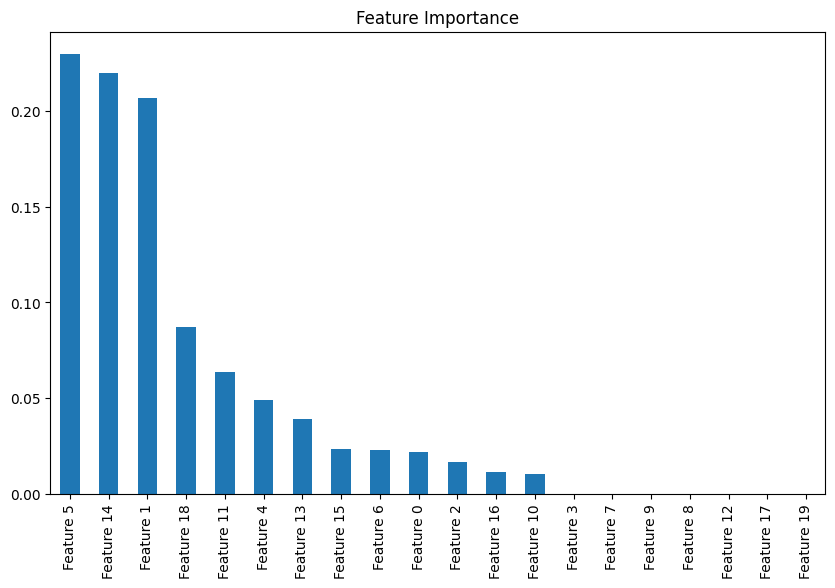

In [10]:
# 21
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=[f'Feature {i}' for i in range(X.shape[1])]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


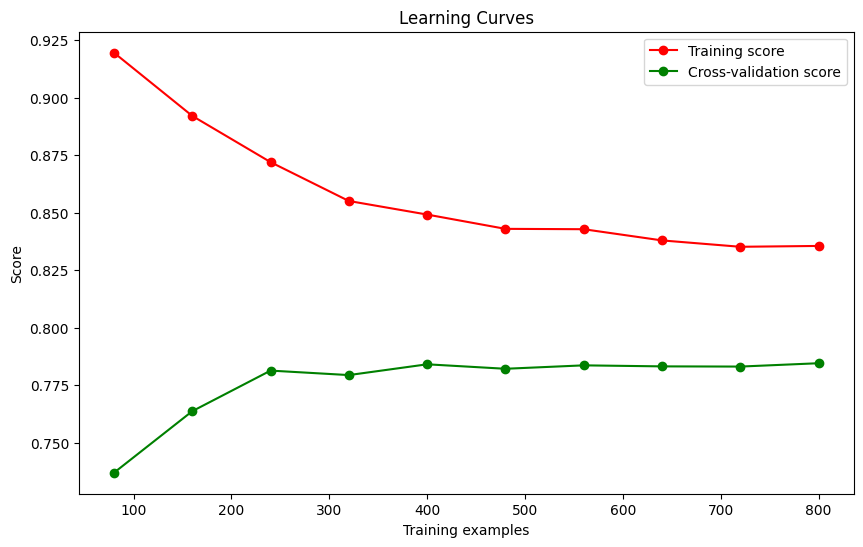

In [13]:
# 22
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


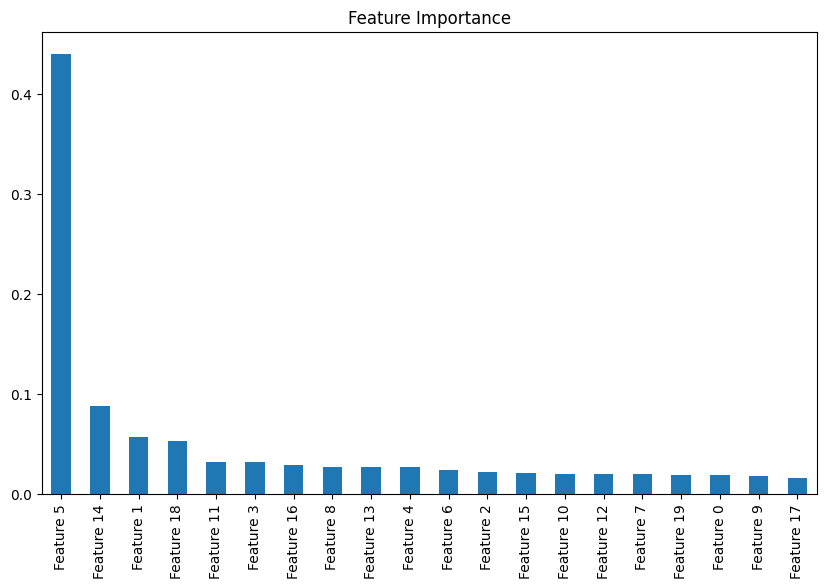

In [14]:
# 23
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=[f'Feature {i}' for i in range(X.shape[1])]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


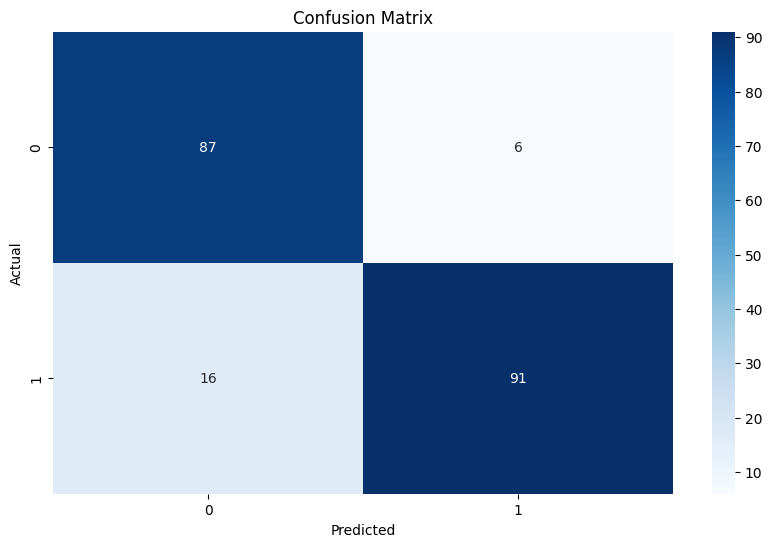

In [15]:
# 24
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
# 25
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [10, 50, 100, 200]
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n} estimators: {accuracy}")


Accuracy with 10 estimators: 0.86
Accuracy with 50 estimators: 0.875
Accuracy with 100 estimators: 0.865
Accuracy with 200 estimators: 0.865


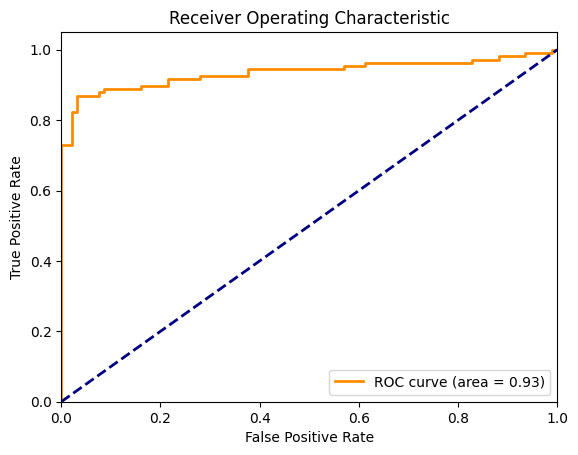

In [17]:
# 26
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [18]:
# 27
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Mean Squared Error:", mse)


Best Learning Rate: 0.1
Mean Squared Error: 5801.289313245902


In [19]:
# 28
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, class_weights=[1, 10], random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1-Score with Class Weighting:", f1)


F1-Score with Class Weighting: 0.6341463414634146


In [20]:
# 29
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.5, 1.0]
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with learning rate {lr}: {accuracy}")


Accuracy with learning rate 0.01: 0.86
Accuracy with learning rate 0.1: 0.86
Accuracy with learning rate 0.5: 0.86
Accuracy with learning rate 1.0: 0.875


In [22]:
# 30
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = make_classification(n_samples=1000, n_features=20, n_informative=3, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print("Log-Loss:", logloss)


Log-Loss: 0.37253949057300295
